In [1]:
from pathlib import Path
import json
import pandas as pd

In [2]:
pd.set_option('display.max_columns', 50)

In [3]:
train_dir = Path('dataset/train')
val_dir = Path('dataset/val')

annotation_path_train = list(train_dir.rglob('*.json'))
annotation_path_val = list(val_dir.rglob('*.json'))

In [4]:
def get_annotations(annotation_paths):
    annotations = []
    for path in annotation_paths:
        with open(path) as f:
            annotations.append(json.load(f))
    return annotations

In [5]:
def get_label_count(annotations):
    label_count = {}
    for annotation in annotations:
        for shape in annotation['shapes']:
            label = shape['label']
            label_count[label] = label_count.get(label, 0) + 1
    return label_count

In [6]:
def get_shape_count(annotations):
    shape_count = {}
    for annotation in annotations:
        cnt = len(annotation['shapes'])
        shape_count[cnt] = shape_count.get(cnt, 0) + 1
    return shape_count

In [7]:
annotations_train = get_annotations(annotation_path_train)
annotations_val = get_annotations(annotation_path_val)

# Shape count

In [8]:
shape_count = pd.DataFrame.from_dict(get_shape_count(annotations_train), orient='index', columns=['train'])
shape_count['val'] = get_shape_count(annotations_val)
shape_count = shape_count.fillna(0).astype(int)
shape_count['total'] = shape_count['train'] + shape_count['val']

In [9]:
shape_count.describe()

,train,val,total
count,35.000000,35.000000,35.000000
mean,15.142857,1.828571,16.971429
std,41.802155,4.792676,46.524178
min,1.000000,0.000000,1.000000
25%,1.000000,0.000000,1.000000
50%,2.000000,0.000000,2.000000
75%,7.500000,1.000000,8.000000
max,227.000000,24.000000,251.000000


In [10]:
shape_count.sort_values('total', ascending=False).transpose()

,46,45,44,43,42,41,40,39,37,38,36,47,31,34,29,35,25,28,33,48,50,32,92,72,90,26,20,84,86,81,54,89,16,27,21
train,227,104,57,28,20,13,13,10,9,6,4,4,4,4,3,2,2,2,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
val,24,15,8,4,2,1,0,1,0,1,2,1,1,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
total,251,119,65,32,22,14,13,11,9,7,6,5,5,5,3,3,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1


<AxesSubplot:xlabel='Number of chromosomes', ylabel='Count'>

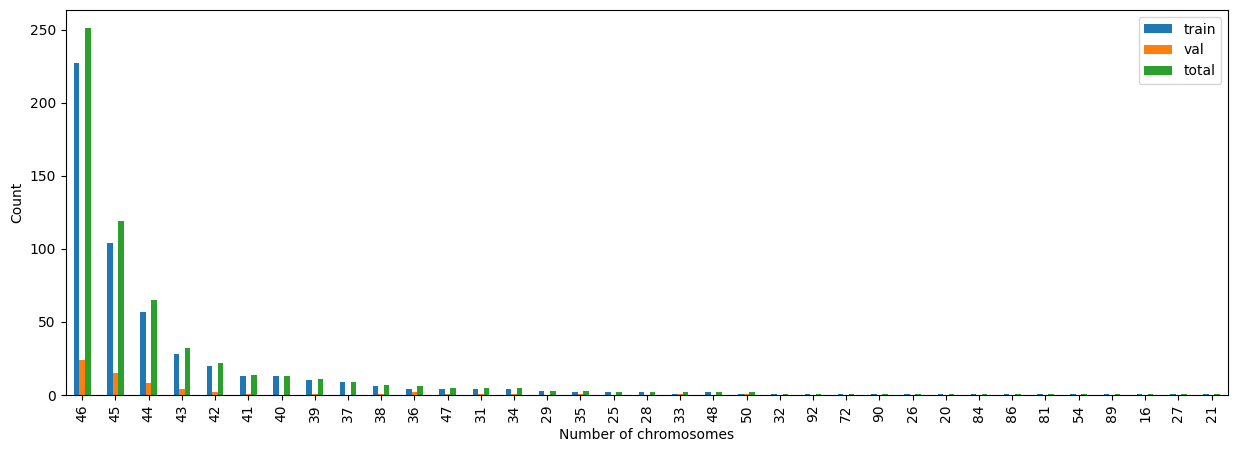

In [11]:
shape_count.sort_values('total', ascending=False).plot(figsize=(15, 5), kind='bar', xlabel='Number of chromosomes', ylabel='Count')

# Label count

In [12]:
label_count = pd.DataFrame.from_dict(get_label_count(annotations_train), orient='index', columns=['train'])
label_count['val'] = get_label_count(annotations_val)
label_count = label_count.fillna(0).astype(int)
label_count['total'] = label_count['train'] + label_count['val']

In [13]:
label_count.describe()

,train,val,total
count,24.000000,24.000000,24.000000
mean,979.250000,121.458333,1100.708333
std,163.029805,21.341894,184.201798
min,266.000000,26.000000,292.000000
25%,1007.750000,123.750000,1133.000000
50%,1019.000000,127.000000,1147.500000
75%,1034.250000,129.000000,1162.500000
max,1050.000000,131.000000,1180.000000


In [14]:
label_count.sort_values('total', ascending=False)

,train,val,total
1,1050,130,1180
5,1041,128,1169
9,1038,131,1169
2,1039,130,1169
4,1039,129,1168
7,1038,129,1167
12,1033,128,1161
10,1032,127,1159
6,1031,127,1158
3,1026,130,1156


<AxesSubplot:xlabel='Chromosome type', ylabel='Count'>

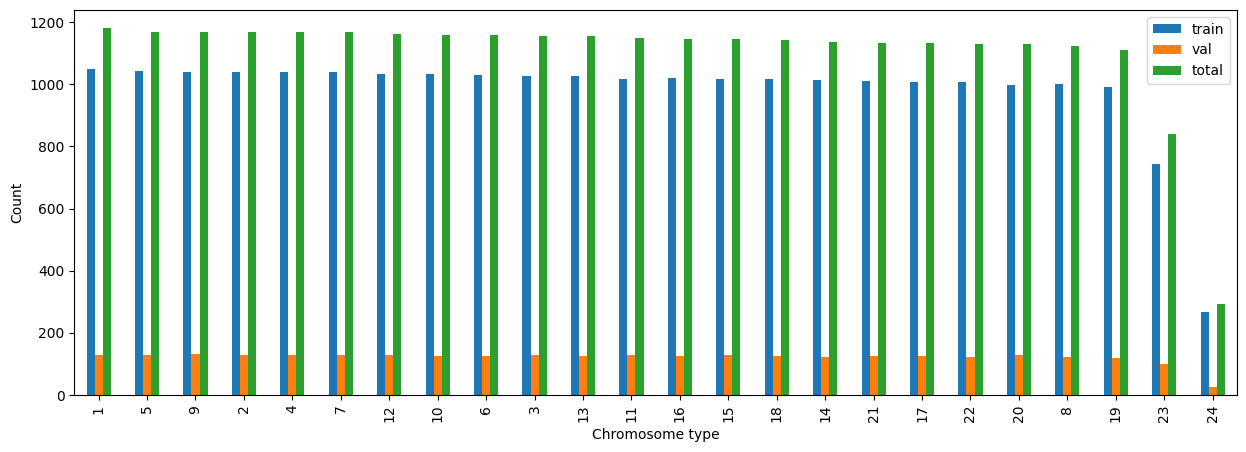

In [15]:
label_count.sort_values('total', ascending=False).plot(figsize=(15, 5), kind='bar', xlabel='Chromosome type', ylabel='Count')